# Homework 03


## Part 1 - Questions

### Question 1: 

How does the average price range vary per cuisine?

* Who (population): Michelin-star restaurants worldwide.
* What (subject, discipline): Culinary rankings and restaurant industry analysis.
* Where (location): Global, but only certain cities are on the guide.
* When (snapshot, longitudinal): The dataset is the Michelin Guide from 2021, so nothing that was added or removed after 2021 will be included.
* How much data do you need to do the analysis/work: I found a xslx file from Kaggle that has the data from 2021. I just need this file to answer my proposed question.
 
### Question 2: 

How does the prevelence of certain cuisines change by latitude

* Who (population): Michelin-starred restaurants worldwide, categorized by cuisine type.
* What (subject, discipline): Geospatial analysis of culinary trends, using Michelin Guide data.
* Where (location): Global, with a focus on latitude bands to analyze regional cuisine trends
* When (snapshot, longitudinal): A snapshot of the Michelin Guide data from 2021.
* How much data do you need to do the analysis/work: A dataset of michelin-starred restaurants from 2021 with cuisine and latitude as columns.

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?
The Michelin Guide collects this data and the owner of this dataset scraped the data and compiled it into an xslx file. This file was found on Kaggle.

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: Michelin Starred Restaurants 2021.xlsx
2. Link to Data: https://guide.michelin.com/ 
3. Source / Origin: 
	* Author or Creator: Dimitris Angelides who webscraped from the Michelin Guide
	* Publication Date: December 2021
	* Publisher: Michelin Guide
	* Version or Data Accessed: Michelin Guide 2021 
4. License: Data files © Original Authors
5. Can You Use this Data Set for Your Intended Use Case? Yes!

## Format




### Overview

* Format: .xlsx
* Size: 1.2 Mb
* Number of Records: 3,155



### Sample of Data




In [1]:
# TODO show a few lines of data from the actual file
import openpyxl

# Opening the workbook, I don't know if this is technically "regular python but since this isn't a csv file I didn't know how else to open this file
wb = openpyxl.load_workbook("../data/raw/MSR2021.xlsx")


sheet = wb.active  


# getting the non_header values 
data_no_headers = [row for i,row in enumerate(sheet.iter_rows(values_only=True)) if i>0]
#getting the headers
headers = [row for i, row in enumerate(sheet.iter_rows(values_only=True)) if i==0]

print(f"These are the headers: {headers}")

#get the first 5 non-header rows
for i, row in enumerate(data_no_headers):
    if i >5:
        break
    else:
        print(row)
# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 

These are the headers: [('restaurant', 'link', 'michelin guide', 'address', 'price', 'cuisine', 'michelin guide point of view', 'facilities & services', 'contact number', 'website', 'opening hours', 'michelin stars', 'location_lat', 'location_long')]
('Pelagos', 'https://guide.michelin.com/en/attica/athens/restaurant/pelagos', 'MICHELIN GUIDE GREECE', 'Four Seasons Astir Palace Hotel, 40 Apollonos Street, Vouliagmeni, Athens, 166 71, Greece', '80 - 155 EUR', 'Seafood', '‘Ocean’ is a fitting name for this hotel restaurant considering its lovely sea views, its 1930s ocean liner styling and its seafood focus. Cooking blends refined French techniques with prime Mediterranean ingredients and is characterised by creativity, sophistication and bold yet harmonious flavours.', '\nT\nAir conditioning\nV\nAmerican Express credit card\nf\nCar park\nCredit card / Debit card accepted\ne\nGreat view\n}\nMastercard credit card\nE\nNon-smoking restaurant\nr\nOutside dining available\nû\nRestaurant offe


### Fields or Column Headers

* Field/Column 1: Price_Range -- numerical data -- int -- np.array
* Field/Column 2: Cuisine -- categorical data  -- string -- np.array
* Field/Column N: Restaurant Name -- categorical data  -- string -- np.array
* Field/Column N: Michelin stars -- categorical data -- string  -- np.array
* Field/Column N: Latitude -- numerical data -- float -- np.array


## Part 3 - Extract / Transform

TODO describe your process for extracting, transforming, cleaning your incoming data:

* what columns you'll be using (extracting) from your dataset
* how you're planning to convert the data into analogous python types / how you'll deal with type issues (for example, you may want a column that's numeric, but the data contains a label, such as 4 months) 
* any other kind of cleaning (_normalizing_ data, filling in missing values, etc.) that you'll have to perform


In [2]:
#function to convert all the prices to USD
def convert_to_USD(currency_li):
    new_li=[]
    #iterate over the inputted list of currency and price ranges
    for row in currency_li:
        #get the currency
        currency = str(row.split()[-1]).strip()
        #get the lower price value
        lower_cost = int(row.split()[0].replace(",",""))
        #try to get the higher price val
        try:
            higher_cost =  int(row.split()[2])
        #if there isn't a higher price val, make the higher price val the lower price val: range = 0
        except:
            higher_cost= lower_cost
        #make a dict of currencies as the key and exchange rates to USD as vals
        exchange_rates = {'EUR': 1.05,'HRK': .14244, 'HUF': .0026, 'PLN': .25, 'CZK': .042, 'CHF': 1.11, 'RUB': .011, 'DKK': .14, 'SEK': .094, 'USD': 1 , 'JPY': .0066, 'TWD': .031, 'SGD': .75, 'KRW': .00069, 'CNY': .14, 'HKD': .13, 'MOP': .12472, 'ISK': .0071, 'GBP': 1.26, 'NOK': .09, 'THB': .03, 'BRL': .17548}
        #index the dict using the currency to find the base to multiply with
        base = exchange_rates[currency]
        #multiply both ints by the base
        lower_cost *= base
        higher_cost *= base
        #new list to append vals to
        li = []
        li.append(round(lower_cost,2))
        li.append(round(higher_cost,2))
        #append the list to the new list
        new_li.append(li)
    #return the nested list
    return new_li
                         
                         
                         
                         
                         
                         
       

In [3]:
# TODO write code here!
import numpy as np
#getting a list of the restaurant names
restaurant_name = [str(row[0]) for row in data_no_headers]
#convert to np array
restaurant=np.array(restaurant_name)
print(f"A sample of the restaurant names: {restaurant[:5]}")
print()



#get a list of the amount of stars that the restaurants have
michelin_stars = [str(row[-3]) for row in data_no_headers]
#convert to np array
stars=np.array(michelin_stars)
print(f"A sample of the Michelin stars: {stars[:5]}")
print()


#getting a list of the cuisine the restaurant is classified as
cuisine = [str(row[5].split(',')[0]) for row in data_no_headers]
#convert to np array
cuisines =np.array(cuisine)
print(f"A sample of the cuisines: {cuisine[:5]}")
print()

#a list of the latitudes
latitude = [round(float(row[-2]),2) for row in data_no_headers]
#convert to np array
lat =np.array(latitude)
print(f"A sample of the latitudes: {lat[:5]}")
print()

#a list of the price ranges with the currencies
price_range = [str(row[4]) for row in data_no_headers]
USD_pr=convert_to_USD(price_range)
#get the average price for each price range
pr = [((row[0]+row[1])/2) for row in USD_pr]
pr=np.array(pr)
print(f"A sample of the price ranges: {pr[:5]}")



A sample of the restaurant names: ['Pelagos' "Botrini's" 'Hytra' 'CTC' 'Varoulko Seaside']

A sample of the Michelin stars: ['1' '1' '1' '1' '1']

A sample of the cuisines: ['Seafood', 'Mediterranean Cuisine', 'Modern Cuisine', 'Modern Cuisine', 'Seafood']

A sample of the latitudes: [37.98 37.98 37.99 37.98 37.98]

A sample of the price ranges: [123.375 110.25   76.125  75.6    54.075]


## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency



In [4]:
# TODO: copy and paste your results here

#MEAN: 
mean = round(np.mean(pr),2)
print(f"The mean of the price ranges for every Michelin-starred restaurant in 2021 was: {mean}")

#MEDIAN: 
median = round(np.median(pr),2)
print(f"The median of the price ranges for every Michelin-starred restaurant in 2021 was: {median}")

#MODE: 
mode = round(np.median(pr),2)
print(f"The mode of the price ranges for every Michelin-starred restaurant in 2021 was: {mode}")


The mean of the price ranges for every Michelin-starred restaurant in 2021 was: 116.94
The median of the price ranges for every Michelin-starred restaurant in 2021 was: 102.9
The mode of the price ranges for every Michelin-starred restaurant in 2021 was: 102.9


#### Dispersion

In [5]:


#STANDARD DEVIATION
stdev = np.std(pr)
print(f"The standard deviation of the price ranges for every Michelin-starred restaurant in 2021 was: {round(stdev,2)}")

#VARIANCE
var = np.var(pr)
print(f"The variance of the price ranges for every Michelin-starred restaurant in 2021 was: {round(var,2)}")


The standard deviation of the price ranges for every Michelin-starred restaurant in 2021 was: 63.02
The variance of the price ranges for every Michelin-starred restaurant in 2021 was: 3971.83


#### Outliers


In [6]:
#NUMBER OF RECORDS
arr_size = len(pr)
print(f"The length of the array containing the price ranges for every Michelin-starred restaurant in 2021 was: {arr_size}")

#MIN VALUE
min_val = min(pr)
print(f"The min value of the price ranges for every Michelin-starred restaurant in 2021 was: {round(min_val,2)}")

#MAX VALUE
max_val = max(pr)
print(f"The max value of the price ranges for every Michelin-starred restaurant in 2021 was: {round(max_val,2)}")

#RANGE
rang3 = max_val - min_val
print(f"The range of the price ranges for every Michelin-starred restaurant in 2021 was: {round(rang3,2)}")


The length of the array containing the price ranges for every Michelin-starred restaurant in 2021 was: 3155
The min value of the price ranges for every Michelin-starred restaurant in 2021 was: 6.0
The max value of the price ranges for every Michelin-starred restaurant in 2021 was: 595.0
The range of the price ranges for every Michelin-starred restaurant in 2021 was: 589.0


#### Other


In [7]:

# IQR
Q1 = np.percentile(pr, 25)
print(f"The first quartile of the price ranges for every Michelin-starred restaurant in 2021 was: {round(Q1,2)}")
Q3 = np.percentile(pr, 75)
print(f"The third quartile of the price ranges for every Michelin-starred restaurant in 2021 was: {round(Q3,2)}")
IQR = Q3 - Q1
print(f"The IQR of the price ranges for every Michelin-starred restaurant in 2021 was: {round(IQR,2)}")

The first quartile of the price ranges for every Michelin-starred restaurant in 2021 was: 76.12
The third quartile of the price ranges for every Michelin-starred restaurant in 2021 was: 139.93
The IQR of the price ranges for every Michelin-starred restaurant in 2021 was: 63.81


###  Analysis on Categorical Data

#### Frequency

In [8]:
# TODO: copy and paste your results here

#COUNTS:
unique_vals,counts = np.unique(cuisines, return_counts=True)
print(f"The unique vals of the price ranges for every Michelin-starred restaurant in 2021 were:\n {counts}")

The unique vals of the price ranges for every Michelin-starred restaurant in 2021 were:
 [  7   7   2   5   1   3   2   4   9   2  13   2  69   2   1   4  24   3
 107  55   1 115   1   9   2 633   6  27   2   1   2   1   1   1  15   1
 109  34   4   2   5   1   1   2   1   5   2   2  11  50   5   1   1  67
  18   1 262   5   1  16  19   1  52   7   1  40 866  94   1   1   1   3
   3   1   1   7   3   7   2  16   2   4   1  48   1   1  13   1   1   3
   3   1  13   1   9   2   2  66   5   6  22   1  14   3   5  25   5   2
   2   8   2  10   1]


#### Unique Values

In [9]:
# TODO: copy and paste your results here

unique_vals,counts = np.unique(cuisines, return_counts=True)
print(f"The unique vals of the price ranges for every Michelin-starred restaurant in 2021 were:\n {unique_vals}")

The unique vals of the price ranges for every Michelin-starred restaurant in 2021 were:
 ['American' 'Asian' 'Asian Contemporary' 'Asian Influences' 'Austrian'
 'Barbecue' 'Basque' 'Beef Specialities' 'Beijing Cuisine'
 'British Contemporary' 'Californian' 'Campanian' 'Cantonese'
 'Cantonese Roast Meats' 'Catalan' 'Chao Zhou' 'Chinese'
 'Chinese Contemporary' 'Classic Cuisine' 'Classic French' 'Colombian'
 'Contemporary' 'Corsican' 'Country cooking' 'Crab Specialities'
 'Creative' 'Creative British' 'Creative French' 'Cuisine from Abruzzo'
 'Danish' 'Dim Sum' 'Dongbei' 'Emilian' 'European' 'European Contemporary'
 'Finnish' 'French' 'French Contemporary' 'Fugu / Pufferfish' 'Fujian'
 'Fusion' 'Galician' 'Greek' 'Hang Zhou' 'Home Cooking' 'Huaiyang'
 'Hunanese' 'Hungarian' 'Indian' 'Innovative' 'International' 'Irish'
 'Israeli' 'Italian' 'Italian Contemporary' 'Izakaya' 'Japanese'
 'Japanese Contemporary' 'Jiangzhe' 'Korean' 'Market Cuisine'
 'Meats and Grills' 'Mediterranean Cuisine' 

## Part 5 - Visualizations



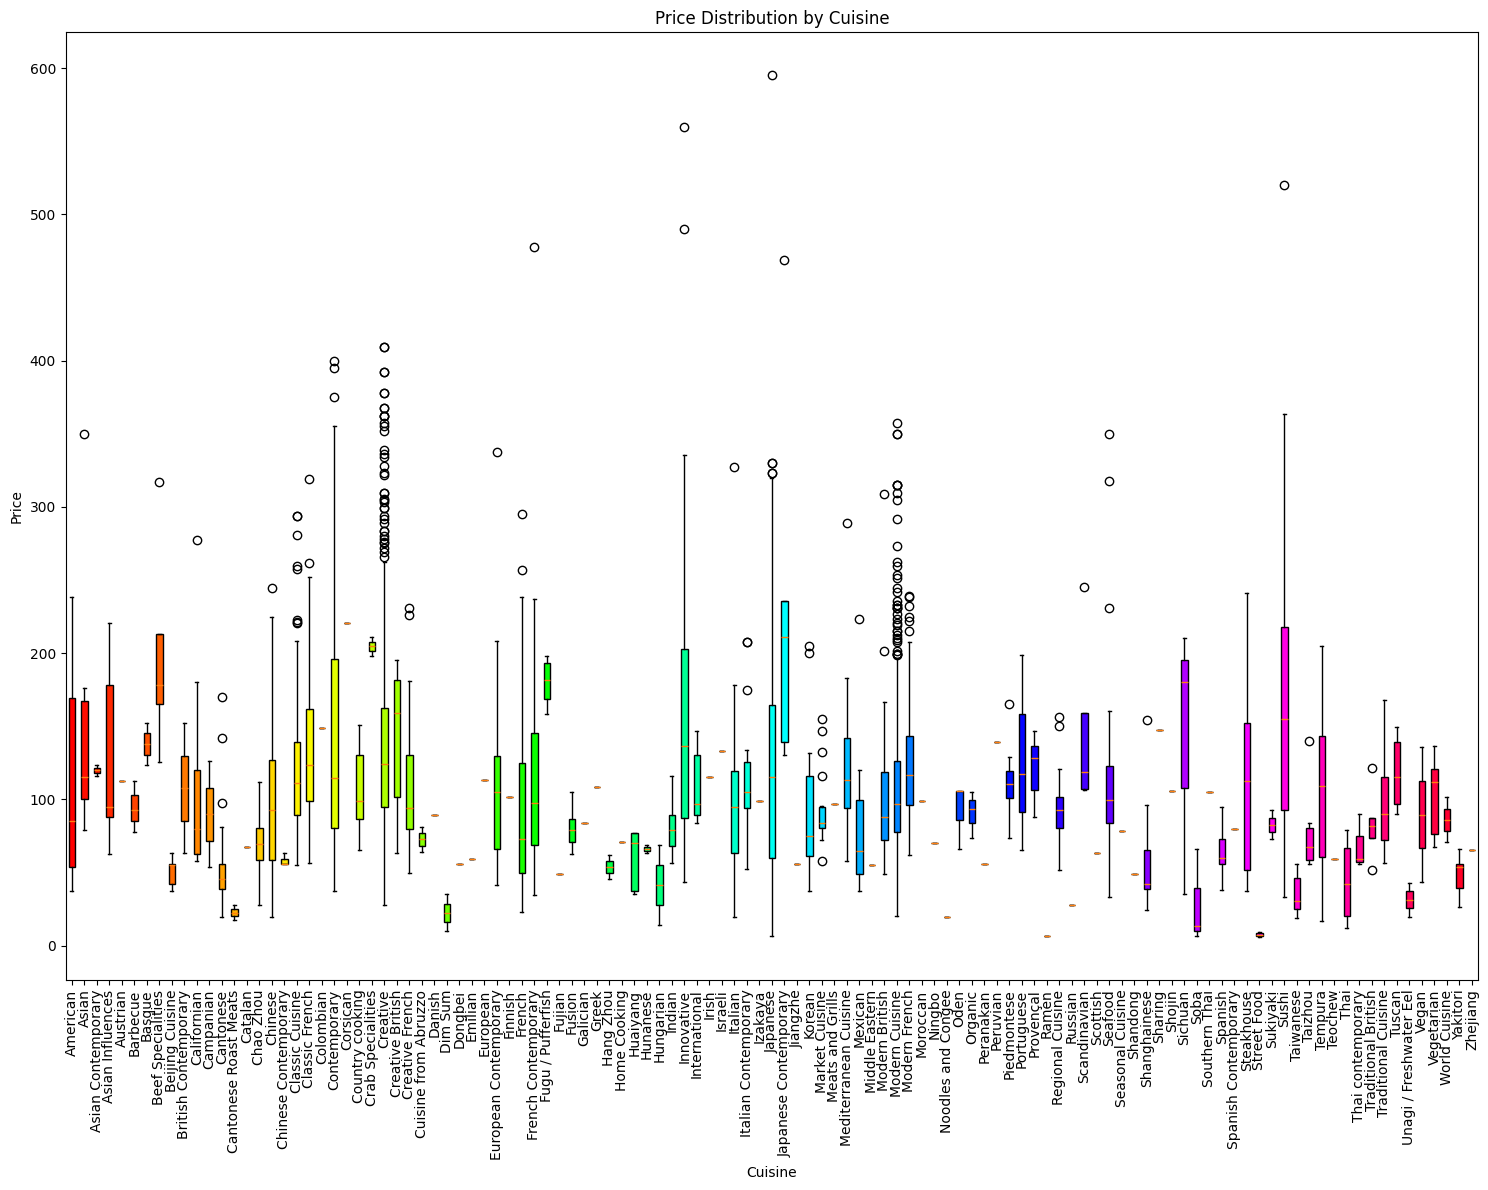

In [26]:
import matplotlib.pyplot as plt

#SHOWING THE VARIANCE OF PRICE RANGES ACROSS CUISINE
#sets the cuisines as a key
data = {cuisine: [] for cuisine in unique_vals}
#iterates through cuisines and prices and appends the prices to the correct cuisine
for cuisine, price in zip(cuisines, pr):
    data[cuisine].append(price)

# get the price
price_lists = [data[cuisine] for cuisine in unique_vals]
#gets a colormap that gives a continious range of hues to apply to the graph
colors = plt.get_cmap("hsv", len(unique_vals))
#configures the dimensions of the plot
plt.figure(figsize=(15, 12))  


box = plt.boxplot(price_lists, patch_artist=True)

# Set colors for each box plot
for i, patch in enumerate(box['boxes']):
    patch.set_facecolor(colors(i))  # Assign each box a different color from the colormap

# Add cuisine names as labels on the x-axis
plt.xticks(range(1, len(unique_vals) + 1), labels=list(unique_vals), rotation=90)
#makes the x-axis as Cuisine
plt.xlabel('Cuisine')
#makes the y-axis as Cuisine
plt.ylabel('Price')
#sets the titles as:
plt.title('Price Distribution by Cuisine')
# Ensure everything fits without overlap
plt.tight_layout()  
#displays the figure
plt.show()





The boxplot provides a clear visual representation of the price variations across different cuisines. Each box in the plot corresponds to a specific cuisine, with the box representing the interquartile range (IQR), which shows where the middle 50% of the prices fall. The median price is marked by a line within each box. The whiskers extending from the box show the range of prices, while any outliers appear as dots outside of the whiskers, highlighting unusually high or low prices. The plot uses distinct colors for each cuisine, chosen from a continuous colormap, to help differentiate between them easily. The x-axis labels the cuisines, which are rotated for better legibility, while the y-axis represents the price range. The title clearly indicates the purpose of the chart, which is to show price distribution across the cuisines. The layout of the plot ensures that the elements are spaced out, making it easy to compare the pricing distributions for each cuisine.


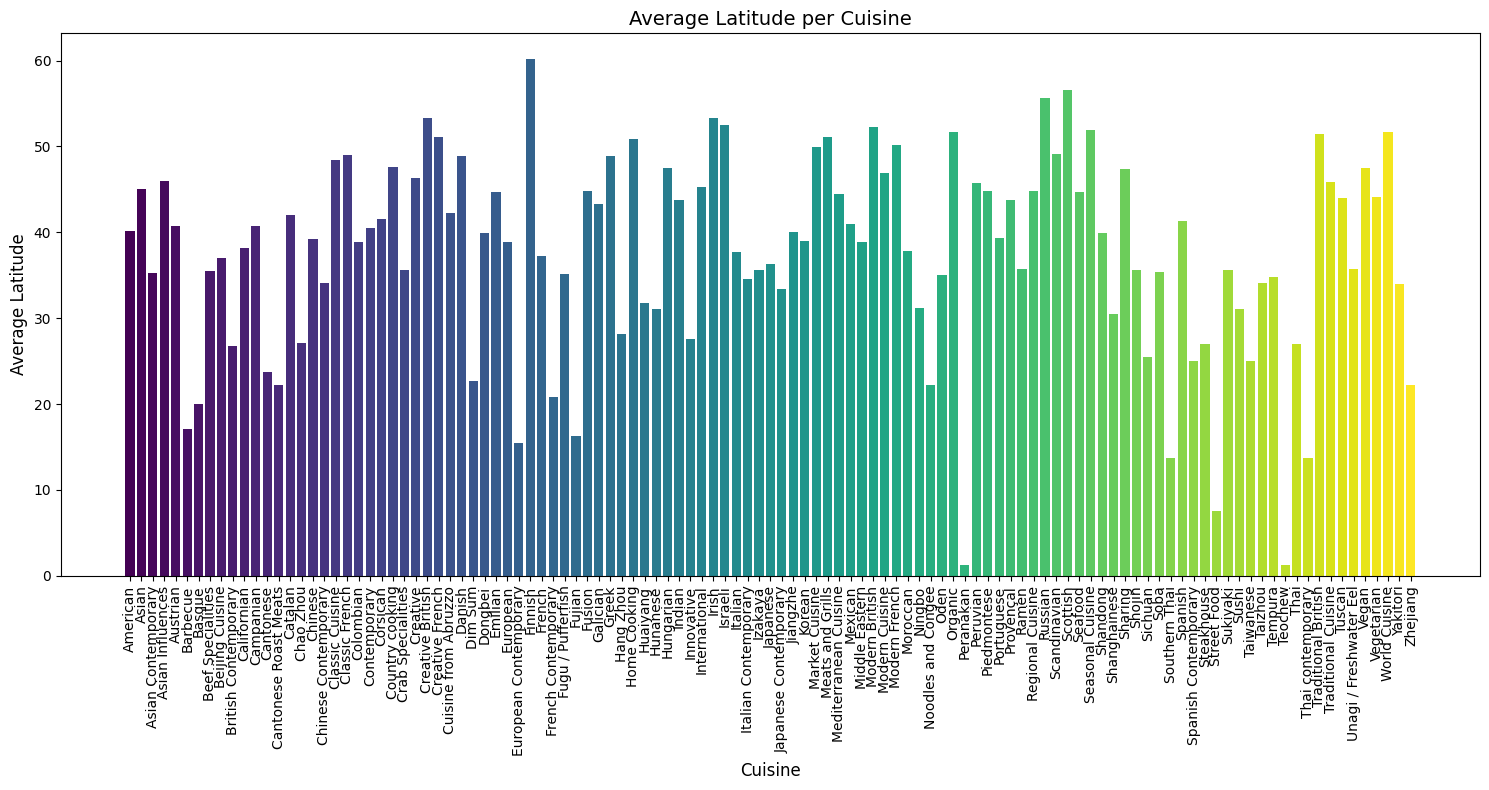

60.17


In [37]:
#AVG LAT ACROSS CUISINE
#makes a dict that sets cuisine as the key and an empty list as values
lat_cuisine = {cuisine: [] for cuisine in unique_vals}
#iterates through cuisines and lats and appends the prices to the correct cuisine
for cuisine, lat in zip(cuisines, latitude):
    lat_cuisine[cuisine].append(abs(lat))
#gets the avg lat for each cuisine
avg_lat_cuisine = [(sum(lat)/len(lat)) for lat in lat_cuisine.values()]
#color map to help with visualizaton
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_vals)))
#makes the figure bigger to help with visualization
plt.figure(figsize=(15,8))
#makes the actual bar graph with cuisine as x-axis, avg lat as y-axis, and color map as colors
plt.bar(unique_vals, avg_lat_cuisine, color= colors)

# Formatting the x-axis labels for better readability
plt.xticks(rotation=90, ha='center', fontsize=10)

# Adding labels and title
plt.xlabel('Cuisine', fontsize=12)
plt.ylabel('Average Latitude', fontsize=12)
plt.title('Average Latitude per Cuisine', fontsize=14)
# Adjust layout to avoid overlap
plt.tight_layout()  
plt.show()



The bar graph illustrates the average latitude of various cuisines, with all latitudes converted to their absolute values. Each bar represents a different cuisine, and the height of the bar reflects the average latitude for that cuisine, calculated by averaging the absolute latitudes of its data points. The bars are colored using the viridis colormap, creating a visual distinction between the cuisines. The x-axis displays the different cuisines, while the y-axis shows the average latitude values. Labels are added to both axes for clarity, with the title indicating the focus on “Average Latitude per Cuisine.” The plot size is adjusted for better readability, and the x-axis labels are rotated to prevent overlap. This visualization effectively shows how different cuisines are geographically distributed by their absolute latitudes. It provides insights into how cuisines may be spread across the globe, considering their geographic origins.

## Part 6 - Conclusion

The boxplot analysis reveals significant variation in the price range across different cuisines. Some cuisines exhibit wider price distributions, indicating a broad range of price points, while others have more consistent pricing. The interquartile range (IQR), shown by the height of each box, varies considerably between cuisines, with certain types of food showing high variability in price, suggesting a diversity of options or premium offerings. Outliers, represented as dots outside the whiskers, highlight particularly high or low-priced items within certain cuisines. This suggests that some cuisines may have a larger spread of offerings, from budget-friendly options to high-end dishes. The boxplot’s color scheme, where each cuisine is assigned a unique color, provides a clear visual representation of these differences. Ultimately, the analysis successfully answers the question of how price ranges vary by cuisine, illustrating that some types of cuisine have much more price variability than others. The findings suggest that factors such as the quality of ingredients, the dining experience, and customer base likely influence these differences.

The bar chart analysis of average latitude per cuisine reveals noticeable geographic trends in cuisine distribution. Different cuisines exhibit varying average latitudes, indicating that certain cuisines are more prevalent in specific regions. For example, tropical cuisines tend to be located at lower latitudes, while others from colder climates are concentrated at higher latitudes. The color gradient applied to each bar, using the “viridis” colormap, helps emphasize these differences visually. The variation in latitudes suggests that environmental factors, regional availability of ingredients, and cultural influences likely play a role in where certain cuisines are more prominent. Additionally, the Michelin Guide, which highlights high-end restaurants, only includes certain countries—primarily developed nations—further skewing the representation of cuisine prevalence. This exclusion of some regions, particularly in the Global South, can lead to an incomplete picture of global culinary diversity. The maximum average latitude value further highlights the geographical extremes for particular cuisines. Overall, the analysis successfully answers the question of how the prevalence of cuisines changes by latitude, demonstrating that cuisine distribution is closely tied to geographical factors and the influence of global food recognition systems like the Michelin Guide.

## Part 7 - Heights and Weights

TODO: add your code cells below this!

The correlation between height and weight rounded to 5 decimal places is: 0.49598


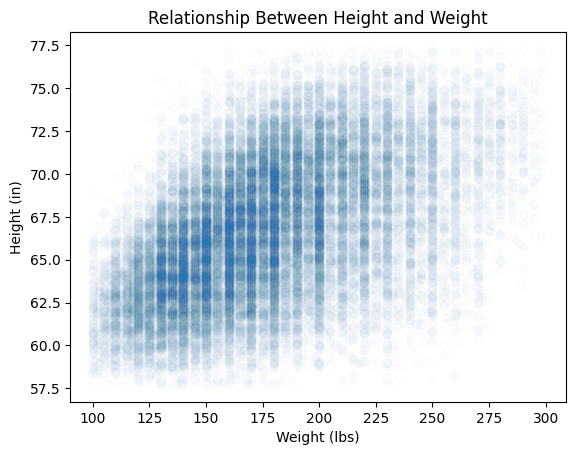

In [90]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import random

#open the file 
with open("../data/raw/adult19.csv", newline='',encoding='utf-8') as f:
    #read to a dict
    reader = csv.DictReader(f)
    #height list
    height_li=[]
    #weight list
    weight_li=[]
    #iterate through the rows
    for row in reader:
        #get the height and weight vals in each row
        height = row.get("HEIGHTTC_A")
        weight = row.get("WEIGHTLBTC_A")
        #if the height and weight have invalid values, don't include them
        if height not in ("96","97","98", "99") and weight not in ("996", "997", "998", '999'):
            height_li.append(float(height))
            weight_li.append(float(weight))
#get the correlation      
corr = np.corrcoef(weight_li, height_li)
print(f"The correlation between height and weight rounded to 5 decimal places is: {round(corr[0][1],5)}")

#add jitter
jitter=1.3
heights = [h + random.uniform(-jitter, jitter) for h in height_li]
#make the plot
plt.scatter(weight_li, heights, alpha=.01)
#set title
plt.title("Relationship Between Height and Weight")
#set x axis
plt.xlabel("Weight (lbs)")
#set y axis
plt.ylabel("Height (in)")
#display
plt.show()

        